In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,scale,normalize
from sklearn_pandas import CategoricalImputer
from sklearn.impute import  KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM



import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import seaborn as sns
sns.set(style="white", color_codes=True)

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [122]:
DF =  pd.read_csv('ESG-data-for-python-2-final.csv')

In [123]:
DF

,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss,S&P,Alpha,Gross Profit Margin,EPS,P/E,EPS Expected growth 3-5 years,P/S,Vix,Current Ratio,Total Debt to Equity,EV/EBITDA,ESG controversies score,ESG reporting score,Short interest %
0,POOL.OQ,31/12/2009,NaN,NaN,NaN,NaN,19.08,Leisure Goods,9.340977e+08,6.18%,23.45%,-17.27%,28.88563,0.96625,52.694082,0.595829,0.595829,20.83,2.12299,1.35646,9.102375,NaN,NaN,12.79011582
1,POOL.OQ,31/12/2010,NaN,NaN,NaN,NaN,22.54,Leisure Goods,1.120349e+09,18.13%,12.78%,5.35%,29.20676,1.14,20.525429,0.698754,0.698754,17.09,1.88596,0.98711,11.673659,NaN,NaN,9.15730007
2,POOL.OQ,31/12/2011,NaN,NaN,NaN,NaN,30.10,Leisure Goods,1.433334e+09,33.54%,0.00%,33.54%,29.20298,1.45333,20.948311,0.812399,0.812399,22.26,2.25299,0.69722,11.632111,NaN,NaN,7.833065289
3,POOL.OQ,31/12/2012,NaN,NaN,NaN,NaN,42.32,Leisure Goods,1.976515e+09,40.60%,13.41%,27.19%,29.64282,1.82444,25.576870,1.030735,1.030735,17.63,2.34805,0.88409,12.058766,NaN,NaN,3.1734648
4,POOL.OQ,31/12/2013,NaN,NaN,NaN,NaN,58.14,Leisure Goods,2.670793e+09,37.38%,29.60%,7.78%,29.03862,2.04111,29.524830,1.305546,1.305546,13.35,2.18994,0.81991,13.327730,NaN,NaN,4.212549796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,AVY.N,31/12/2016,64.982576,78.062015,58.300713,56.249481,70.22,Industrial Materials,6.248989e+09,12.07%,9.54%,2.53%,27.53859,3.969,20.311352,1.043150,1.043150,13.76,1.21678,1.09651,9.135427,100.0,NaN,4.087801151
6056,AVY.N,31/12/2017,69.215448,76.735375,63.234024,67.820084,114.86,Industrial Materials,1.011186e+10,63.57%,19.42%,44.15%,27.97174,4.9306,25.613865,1.572777,1.572777,10.71,0.95036,1.39654,9.308653,100.0,100.0,2.079867327
6057,AVY.N,31/12/2018,58.365602,58.068948,51.709823,70.098320,89.83,Industrial Materials,7.789182e+09,-21.79%,-6.24%,-15.55%,27.41843,6.03942,16.426748,1.093126,1.093126,24.96,1.13495,1.51185,12.578589,100.0,NaN,1.610676969
6058,AVY.N,31/12/2019,52.176495,49.004974,54.708569,52.749035,130.82,Industrial Materials,1.092385e+10,45.63%,28.88%,16.75%,26.81939,6.55983,47.179406,1.545995,1.545995,13.59,1.15246,2.05863,9.970070,100.0,NaN,1.837228603


In [124]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6060 entries, 0 to 6059
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Instrument                     6060 non-null   object 
 1   Date                           6060 non-null   object 
 2   ESG Score                      5548 non-null   float64
 3   Environmental Pillar score     5548 non-null   float64
 4   Social Pillar score            5548 non-null   float64
 5   Governance Pillar score        5548 non-null   float64
 6   Stock Price                    5781 non-null   float64
 7   Sector                         5976 non-null   object 
 8   Market Cap                     5804 non-null   float64
 9   Gain or loss                   6060 non-null   object 
 10  S&P                            6060 non-null   object 
 11  Alpha                          6060 non-null   object 
 12  Gross Profit Margin            5240 non-null   f

In [125]:
DF.isna().sum()

Instrument                          0
Date                                0
ESG Score                         512
Environmental Pillar score        512
Social Pillar score               512
Governance Pillar score           512
Stock Price                       279
Sector                             84
Market Cap                        256
Gain or loss                        0
S&P                                 0
Alpha                               0
Gross Profit Margin               820
EPS                               343
P/E                               781
EPS Expected growth 3-5 years     268
P/S                               268
Vix                                 0
Current Ratio                     878
Total Debt to Equity              635
EV/EBITDA                         502
ESG controversies score           507
ESG reporting score              3022
Short interest %                  300
dtype: int64

In [126]:
DF.dropna(subset=['Environmental Pillar score','Social Pillar score','Governance Pillar score'], how='all',inplace=True)

In [127]:
DF.isna().sum()

Instrument                          0
Date                                0
ESG Score                           0
Environmental Pillar score          0
Social Pillar score                 0
Governance Pillar score             0
Stock Price                        28
Sector                             71
Market Cap                         10
Gain or loss                        0
S&P                                 0
Alpha                               0
Gross Profit Margin               680
EPS                                88
P/E                               474
EPS Expected growth 3-5 years      18
P/S                                18
Vix                                 0
Current Ratio                     688
Total Debt to Equity              382
EV/EBITDA                         198
ESG controversies score             0
ESG reporting score              2512
Short interest %                   51
dtype: int64

In [128]:
DF.corr()['Environmental Pillar score'],DF.corr()['Social Pillar score'],DF.corr()['Social Pillar score'],DF.corr()['Governance Pillar score']

(ESG Score                        0.856865
 Environmental Pillar score       1.000000
 Social Pillar score              0.725884
 Governance Pillar score          0.424936
 Stock Price                     -0.022561
 Market Cap                       0.250257
 Gross Profit Margin             -0.106267
 P/E                             -0.033155
 EPS Expected growth 3-5 years   -0.138052
 P/S                             -0.138052
 Vix                              0.006317
 Current Ratio                   -0.136088
 EV/EBITDA                        0.016863
 ESG controversies score         -0.284720
 ESG reporting score             -0.059650
 Name: Environmental Pillar score, dtype: float64,
 ESG Score                        0.878800
 Environmental Pillar score       0.725884
 Social Pillar score              1.000000
 Governance Pillar score          0.394150
 Stock Price                     -0.002418
 Market Cap                       0.253590
 Gross Profit Margin              0.031017
 P/

In [129]:
DF = DF.drop(['ESG Score','ESG reporting score','EV/EBITDA','Vix','Date'],axis =1)

In [130]:
DF.isna().sum()

Instrument                         0
Environmental Pillar score         0
Social Pillar score                0
Governance Pillar score            0
Stock Price                       28
Sector                            71
Market Cap                        10
Gain or loss                       0
S&P                                0
Alpha                              0
Gross Profit Margin              680
EPS                               88
P/E                              474
EPS Expected growth 3-5 years     18
P/S                               18
Current Ratio                    688
Total Debt to Equity             382
ESG controversies score            0
Short interest %                  51
dtype: int64

In [131]:
DF

,Instrument,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss,S&P,Alpha,Gross Profit Margin,EPS,P/E,EPS Expected growth 3-5 years,P/S,Current Ratio,Total Debt to Equity,ESG controversies score,Short interest %
6,POOL.OQ,2.022977,34.166808,74.615226,80.78,Leisure Goods,3.441286e+09,27.33%,-0.73%,28.06%,28.63665,2.83111,28.953509,1.480437,1.480437,2.18292,1.31302,100.0,3.486765504
7,POOL.OQ,12.053571,36.498279,75.255474,104.34,Leisure Goods,4.313337e+09,29.17%,9.54%,19.63%,28.59095,3.4475,30.236029,1.697734,1.697734,2.17076,1.28271,100.0,2.529258086
8,POOL.OQ,12.564935,36.792886,38.926327,129.65,Leisure Goods,5.207626e+09,24.26%,19.42%,4.84%,28.82706,4.06333,32.864052,1.912290,1.912290,2.34811,2.1346,100.0,3.729016357
9,POOL.OQ,13.314050,35.168869,66.349145,148.65,Leisure Goods,5.985139e+09,14.65%,-6.24%,20.89%,28.88216,5.6525,26.868456,2.018462,2.018462,2.43262,2.32874,100.0,3.206998982
10,POOL.OQ,14.062500,29.707335,81.211420,212.38,Leisure Goods,8.503214e+09,42.87%,28.88%,13.99%,29.02418,6.3225,33.330979,2.690579,2.690579,2.99481,2.98207,100.0,2.763110045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,AVY.N,78.062015,58.300713,56.249481,70.22,Industrial Materials,6.248989e+09,12.07%,9.54%,2.53%,27.53859,3.969,20.311352,1.043150,1.043150,1.21678,1.09651,100.0,4.087801151
6056,AVY.N,76.735375,63.234024,67.820084,114.86,Industrial Materials,1.011186e+10,63.57%,19.42%,44.15%,27.97174,4.9306,25.613865,1.572777,1.572777,0.95036,1.39654,100.0,2.079867327
6057,AVY.N,58.068948,51.709823,70.098320,89.83,Industrial Materials,7.789182e+09,-21.79%,-6.24%,-15.55%,27.41843,6.03942,16.426748,1.093126,1.093126,1.13495,1.51185,100.0,1.610676969
6058,AVY.N,49.004974,54.708569,52.749035,130.82,Industrial Materials,1.092385e+10,45.63%,28.88%,16.75%,26.81939,6.55983,47.179406,1.545995,1.545995,1.15246,2.05863,100.0,1.837228603


In [132]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5548 entries, 6 to 6059
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Instrument                     5548 non-null   object 
 1   Environmental Pillar score     5548 non-null   float64
 2   Social Pillar score            5548 non-null   float64
 3   Governance Pillar score        5548 non-null   float64
 4   Stock Price                    5520 non-null   float64
 5   Sector                         5477 non-null   object 
 6   Market Cap                     5538 non-null   float64
 7   Gain or loss                   5548 non-null   object 
 8   S&P                            5548 non-null   object 
 9   Alpha                          5548 non-null   object 
 10  Gross Profit Margin            4868 non-null   float64
 11  EPS                            5460 non-null   object 
 12  P/E                            5074 non-null   f

In [133]:
pd.unique(DF.Instrument)

array(['POOL.OQ', 'CHRW.OQ', 'AJG.N', 'CNP.N', 'AMCR.N', 'WM.N', 'PRGO.N',
       'BA.N', 'FOX.OQ', 'LIN.N', 'WY.N', 'MCD.N', 'HD.N', 'SPG.N',
       'HBAN.OQ', 'QRVO.OQ', 'LVS.N', 'COG.N', 'AIG.N', 'AIZ.N',
       'COST.OQ', 'MCO.N', 'DIS.N', 'PAYX.OQ', 'AMD.OQ', 'REG.OQ',
       'DHI.N', 'TRV.N', 'BIO.N', 'MOS.N', 'BWA.N', 'WDC.OQ', 'VTR.N',
       'IVZ.N', 'ZBRA.OQ', 'AMAT.OQ', 'STX.OQ', 'SYK.N', 'VRSN.OQ',
       'NVR.N', 'LB.N', 'LOW.N', 'BSX.N', 'SYY.N', 'FCX.N', 'MAS.N',
       'BEN.N', 'FB.OQ', 'EVRG.N', 'EXPD.OQ', 'PAYC.N', 'EXPE.OQ',
       'RJF.N', 'CL.N', 'CE.N', 'UNH.N', 'ARE.N', 'UAA.N', 'NLOK.OQ',
       'LLY.N', 'NWL.OQ', 'ISRG.OQ', 'AVB.N', 'PVH.N', 'TPR.N', 'CBRE.N',
       'CINF.OQ', 'SEE.N', 'WMB.N', 'EA.OQ', 'TMUS.OQ', 'CB.N', 'TXN.OQ',
       'MDLZ.OQ', 'BLL.N', 'PFG.OQ', 'KEYS.N', 'RL.N', 'JPM.N', 'INFO.N',
       'TTWO.OQ', 'CDW.OQ', 'RMD.N', 'LNT.OQ', 'NOV.N', 'CMG.N',
       'PCAR.OQ', 'GNRC.N', 'CHTR.OQ', 'PWR.N', 'CCL.N', 'PM.N', 'COO.N',
       'SNA.N', 'UA

In [134]:
DF['Instrument'] = LabelEncoder().fit_transform(DF['Instrument'])

In [135]:
DF['Sector'] = CategoricalImputer().fit_transform(DF['Sector'])
DF['Sector'] = LabelEncoder().fit_transform(DF['Sector'])

In [136]:
DF['Stock Price'] = KNNImputer().fit_transform(np.array(DF['Stock Price']).reshape(-1,1))

In [137]:
DF['Market Cap'] = KNNImputer().fit_transform(np.array(DF['Market Cap']).reshape(-1,1))

In [138]:
DF['Gross Profit Margin '] = KNNImputer().fit_transform(np.array(DF['Gross Profit Margin ']).reshape(-1,1))

In [139]:
indexes = DF[DF['EPS'] == 'Too many long running requests were detected for GEDTC-425286@OFFICE5WEB:UNITY. All requests would be denied for the next 5 minutes.'].index
DF.drop(indexes,inplace=True)

In [140]:
DF['EPS'] = KNNImputer().fit_transform(np.array(DF['EPS']).reshape(-1,1))

In [141]:
DF['P/E'] = KNNImputer().fit_transform(np.array(DF['P/E']).reshape(-1,1))

In [142]:
DF['EPS Expected growth 3-5 years'] = KNNImputer().fit_transform(np.array(DF['EPS Expected growth 3-5 years']).reshape(-1,1))

In [143]:
DF['P/S'] = KNNImputer().fit_transform(np.array(DF['P/S']).reshape(-1,1))

In [144]:
DF['Current Ratio'] = KNNImputer().fit_transform(np.array(DF['Current Ratio']).reshape(-1,1))

In [145]:
indexes = DF[DF['Total Debt to Equity ']=='0.3462+AA376'].index
DF.drop(indexes,inplace=True)

In [146]:
DF['Total Debt to Equity '] = KNNImputer().fit_transform(np.array(DF['Total Debt to Equity ']).reshape(-1,1))

In [147]:
indexes = DF[DF['Short interest % ']=='Unable to resolve and collect data for all requested identifiers and fields.'].index
DF.drop(indexes,inplace=True)

In [148]:
DF['Short interest % '] = KNNImputer().fit_transform(np.array(DF['Short interest % ']).reshape(-1,1))

In [149]:
DF.isna().sum()

Instrument                       0
Environmental Pillar score       0
Social Pillar score              0
Governance Pillar score          0
Stock Price                      0
Sector                           0
Market Cap                       0
Gain or loss                     0
S&P                              0
Alpha                            0
Gross Profit Margin              0
EPS                              0
P/E                              0
EPS Expected growth 3-5 years    0
P/S                              0
Current Ratio                    0
Total Debt to Equity             0
ESG controversies score          0
Short interest %                 0
dtype: int64

In [150]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5458 entries, 6 to 6059
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Instrument                     5458 non-null   int64  
 1   Environmental Pillar score     5458 non-null   float64
 2   Social Pillar score            5458 non-null   float64
 3   Governance Pillar score        5458 non-null   float64
 4   Stock Price                    5458 non-null   float64
 5   Sector                         5458 non-null   int64  
 6   Market Cap                     5458 non-null   float64
 7   Gain or loss                   5458 non-null   object 
 8   S&P                            5458 non-null   object 
 9   Alpha                          5458 non-null   object 
 10  Gross Profit Margin            5458 non-null   float64
 11  EPS                            5458 non-null   float64
 12  P/E                            5458 non-null   f

In [151]:
def remove_percentage_sign(x):
  return float(x[:-1])

In [152]:
indexes = DF[DF['Gain or loss'] == '#VALUE!'].index
DF.drop(indexes,inplace=True)


In [153]:
DF['S&P'] = DF['S&P'].map(remove_percentage_sign)
DF['Gain or loss'] = DF['Gain or loss'].map(remove_percentage_sign) 
indexes = DF[DF['Alpha'] == '#VALUE!'].index
DF.drop(indexes,inplace=True)

DF['Alpha'] = DF['Alpha'].map(remove_percentage_sign)

# Data is Cleaned properly

In [154]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5404 entries, 6 to 6059
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Instrument                     5404 non-null   int64  
 1   Environmental Pillar score     5404 non-null   float64
 2   Social Pillar score            5404 non-null   float64
 3   Governance Pillar score        5404 non-null   float64
 4   Stock Price                    5404 non-null   float64
 5   Sector                         5404 non-null   int64  
 6   Market Cap                     5404 non-null   float64
 7   Gain or loss                   5404 non-null   float64
 8   S&P                            5404 non-null   float64
 9   Alpha                          5404 non-null   float64
 10  Gross Profit Margin            5404 non-null   float64
 11  EPS                            5404 non-null   float64
 12  P/E                            5404 non-null   f

In [155]:
DF

,Instrument,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss,S&P,Alpha,Gross Profit Margin,EPS,P/E,EPS Expected growth 3-5 years,P/S,Current Ratio,Total Debt to Equity,ESG controversies score,Short interest %
6,374,2.022977,34.166808,74.615226,80.78,22,3.441286e+09,27.33,-0.73,28.06,28.63665,2.83111,28.953509,1.480437,1.480437,2.18292,1.31302,100.0,3.486766
7,374,12.053571,36.498279,75.255474,104.34,22,4.313337e+09,29.17,9.54,19.63,28.59095,3.44750,30.236029,1.697734,1.697734,2.17076,1.28271,100.0,2.529258
8,374,12.564935,36.792886,38.926327,129.65,22,5.207626e+09,24.26,19.42,4.84,28.82706,4.06333,32.864052,1.912290,1.912290,2.34811,2.13460,100.0,3.729016
9,374,13.314050,35.168869,66.349145,148.65,22,5.985139e+09,14.65,-6.24,20.89,28.88216,5.65250,26.868456,2.018462,2.018462,2.43262,2.32874,100.0,3.206999
10,374,14.062500,29.707335,81.211420,212.38,22,8.503214e+09,42.87,28.88,13.99,29.02418,6.32250,33.330979,2.690579,2.690579,2.99481,2.98207,100.0,2.763110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,50,78.062015,58.300713,56.249481,70.22,17,6.248989e+09,12.07,9.54,2.53,27.53859,3.96900,20.311352,1.043150,1.043150,1.21678,1.09651,100.0,4.087801
6056,50,76.735375,63.234024,67.820084,114.86,17,1.011186e+10,63.57,19.42,44.15,27.97174,4.93060,25.613865,1.572777,1.572777,0.95036,1.39654,100.0,2.079867
6057,50,58.068948,51.709823,70.098320,89.83,17,7.789182e+09,-21.79,-6.24,-15.55,27.41843,6.03942,16.426748,1.093126,1.093126,1.13495,1.51185,100.0,1.610677
6058,50,49.004974,54.708569,52.749035,130.82,17,1.092385e+10,45.63,28.88,16.75,26.81939,6.55983,47.179406,1.545995,1.545995,1.15246,2.05863,100.0,1.837229


Correaltion For Environmental Pillar Score 


Instrument                      -0.018410
Environmental Pillar score       1.000000
Social Pillar score              0.724135
Governance Pillar score          0.420117
Stock Price                     -0.026100
Sector                           0.013668
Market Cap                       0.248033
Gain or loss                    -0.116123
S&P                              0.013917
Alpha                           -0.128764
Gross Profit Margin             -0.094349
EPS                              0.004293
P/E                             -0.031905
EPS Expected growth 3-5 years   -0.137761
P/S                             -0.137761
Current Ratio                   -0.125600
Total Debt to Equity            -0.006022
ESG controversies score         -0.284137
Short interest %                 0.007328
Name: Environmental Pillar score, dtype: float64


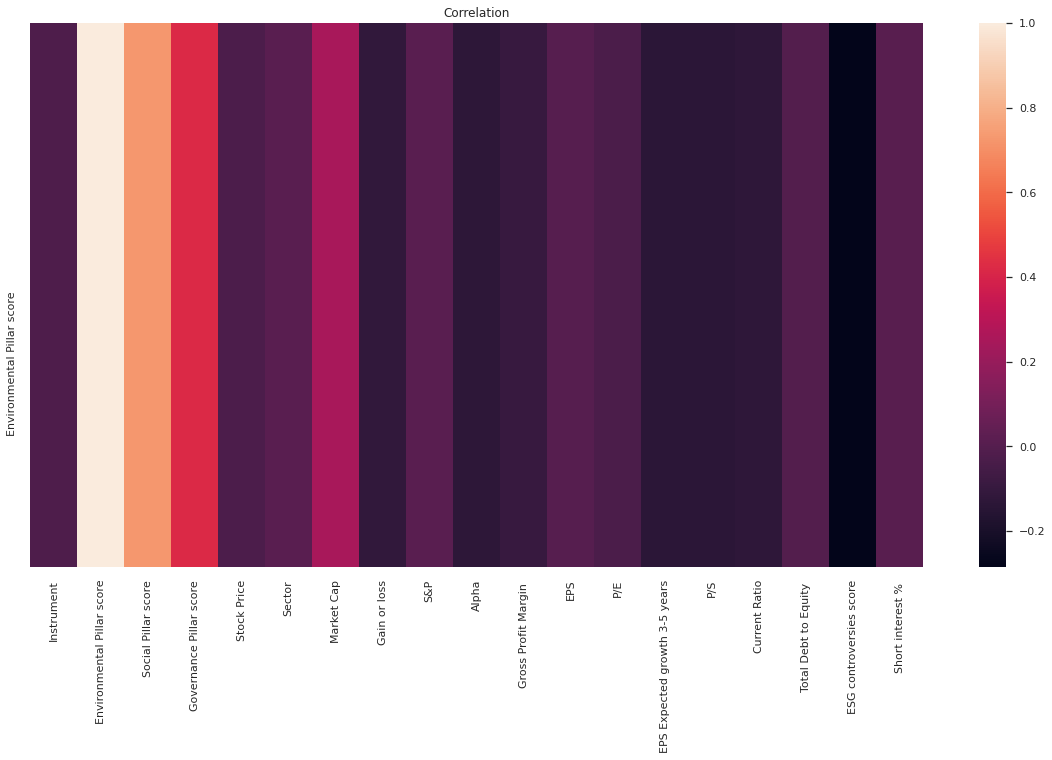

In [156]:
print('\033[1m' + 'Correaltion For Environmental Pillar Score' + '\033[0m','\n\n')
print(DF.corr()['Environmental Pillar score'])
plt.figure(figsize=(20,10))
plt.title('Correlation')
sns.heatmap(DF.corr().loc[['Environmental Pillar score'],:])

Correaltion For Social Pillar Score 


Instrument                      -0.039450
Environmental Pillar score       0.724135
Social Pillar score              1.000000
Governance Pillar score          0.389828
Stock Price                     -0.005489
Sector                           0.085321
Market Cap                       0.253601
Gain or loss                    -0.105193
S&P                              0.015117
Alpha                           -0.117476
Gross Profit Margin              0.034869
EPS                              0.017538
P/E                             -0.038045
EPS Expected growth 3-5 years   -0.037302
P/S                             -0.037302
Current Ratio                   -0.121406
Total Debt to Equity             0.001111
ESG controversies score         -0.265892
Short interest %                -0.009490
Name: Social Pillar score, dtype: float64


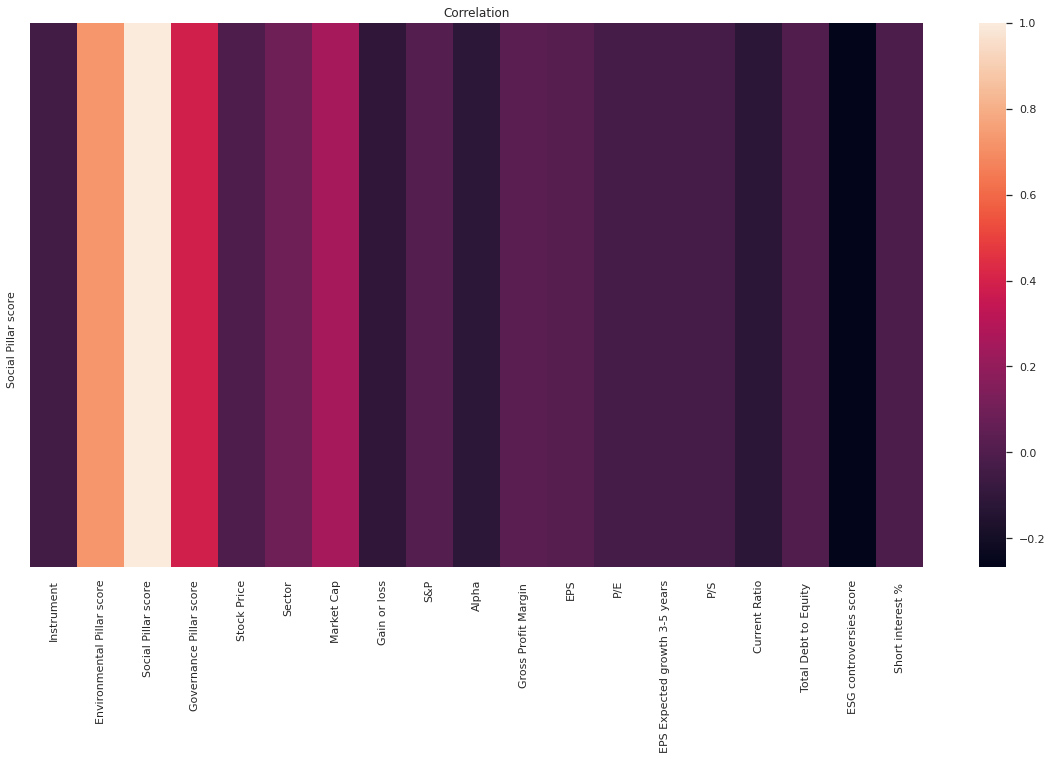

In [157]:
print('\033[1m' + 'Correaltion For Social Pillar Score' + '\033[0m','\n\n')
print(DF.corr()['Social Pillar score'])
plt.figure(figsize=(20,10))
plt.title('Correlation')
sns.heatmap(DF.corr().loc[['Social Pillar score'],:])

Correaltion For Governance Pillar Score 


Instrument                      -0.045483
Environmental Pillar score       0.420117
Social Pillar score              0.389828
Governance Pillar score          1.000000
Stock Price                      0.009093
Sector                          -0.089334
Market Cap                       0.128277
Gain or loss                    -0.106912
S&P                              0.004247
Alpha                           -0.115716
Gross Profit Margin             -0.097895
EPS                              0.042254
P/E                             -0.013127
EPS Expected growth 3-5 years   -0.153588
P/S                             -0.153588
Current Ratio                   -0.119656
Total Debt to Equity            -0.013440
ESG controversies score         -0.115854
Short interest %                 0.012820
Name: Governance Pillar score, dtype: float64


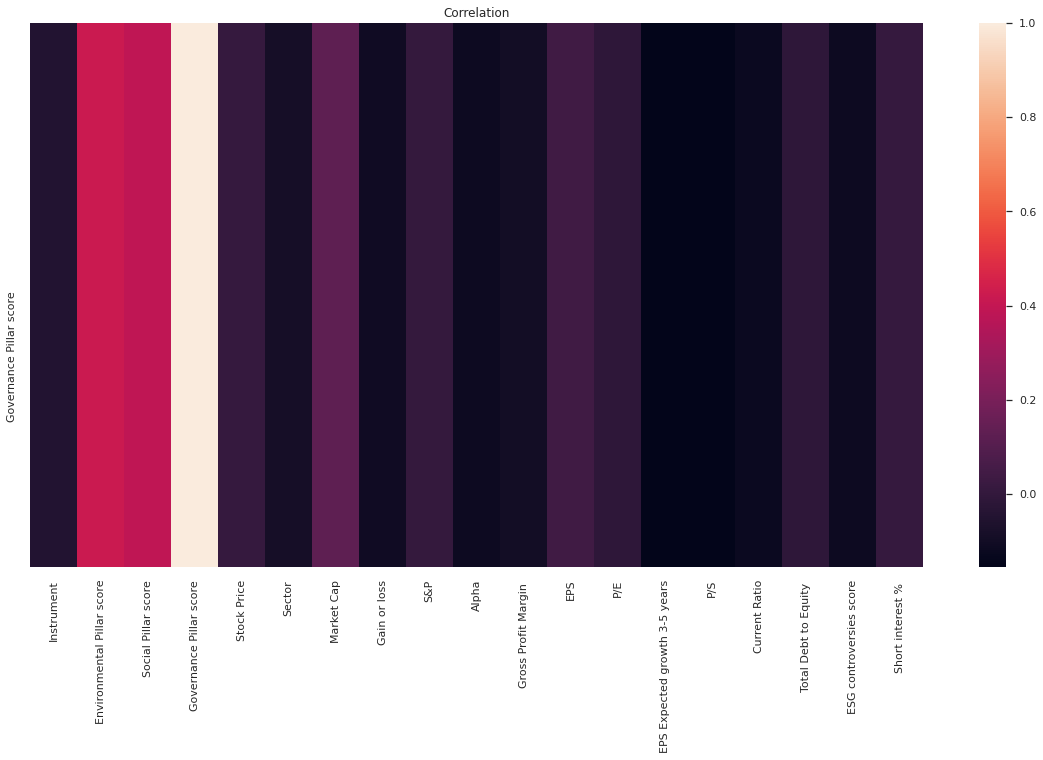

In [158]:
print('\033[1m' + 'Correaltion For Governance Pillar Score' + '\033[0m','\n\n')
print(DF.corr()['Governance Pillar score'])
plt.figure(figsize=(20,10))
plt.title('Correlation')
sns.heatmap(DF.corr().loc[['Governance Pillar score'],:])

In [159]:
Environmental_Pillar_score = DF['Environmental Pillar score'] 
Social_Pillar_score = DF['Social Pillar score']
Governance_Pillar_score = DF['Governance Pillar score']

## Let's create the model

### *For Environmental Pillar score*

In [160]:
X = DF.drop(['Environmental Pillar score'],axis=1)
Y = Environmental_Pillar_score

In [161]:
corr_features = correlation(X, 0.60)
print("No. o features to drop : ",len(set(corr_features)))

X.drop(corr_features,axis=1,inplace=True)
X.columns,len(X.columns)

No. o features to drop :  3


(Index(['Instrument', 'Social Pillar score', 'Governance Pillar score',
        'Stock Price', 'Sector', 'Market Cap', 'Gain or loss', 'S&P',
        'Gross Profit Margin ', 'P/E', 'EPS Expected growth 3-5 years',
        'Current Ratio', 'Total Debt to Equity ', 'ESG controversies score',
        'Short interest % '],
       dtype='object'), 15)

In [162]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

## Random Forest

 Training Model .... 

Model Trained
Accuracy on training data (R2_score) ,  0.9657561540095438
Accuracy on test data (R2_score) ,  0.760984394193307
Mean Squred Error   198.4011716842462
Root Mean Squred Error   14.085495081261653
Mean Absolute Error   10.782257597036702


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 360x360 with 0 Axes>

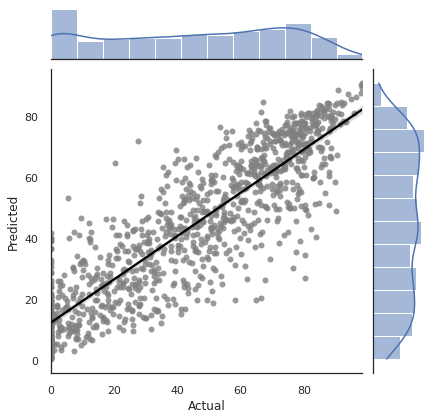

In [163]:
model_rf  = RandomForestRegressor()
print(" Training Model .... \n")
model_rf.fit(X_train,Y_train)
print("Model Trained")
print("Accuracy on training data (R2_score) , ",model_rf.score(X_train,Y_train))
print("Accuracy on test data (R2_score) , ",model_rf.score(X_test,Y_test))


print("Mean Squred Error  ", mean_squared_error(Y_test,model_rf.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model_rf.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model_rf.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,model_rf.predict(X_test),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.ax_joint.set_xlabel('Actual')
ax.ax_joint.set_ylabel('Predicted')


train_sizes, train_scores, validation_scores = learning_curve(
estimator = model_rf,
X = X_train,
y = Y_train, train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1.0]), cv = 5,
scoring = 'r2')


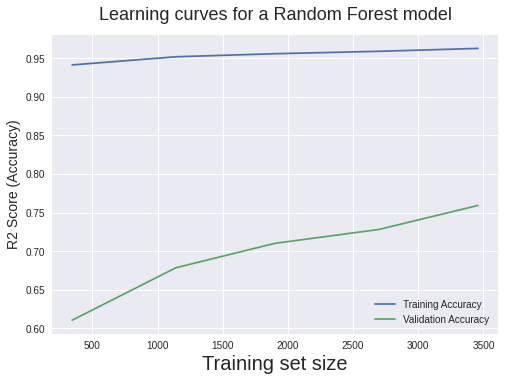

In [164]:
plt.style.use('seaborn')
plt.plot(train_sizes, pd.DataFrame(train_scores).iloc[:,4], label = 'Training Accuracy')
plt.plot(train_sizes, pd.DataFrame(validation_scores).iloc[:,4], label = 'Validation Accuracy')
plt.ylabel('R2 Score (Accuracy)', fontsize = 14)
plt.xlabel('Training set size', fontsize = 20)
plt.title('Learning curves for a Random Forest model', fontsize = 18, y = 1.03)
plt.legend()


## SVM

 Training Model .... 

Model Trained
Accuracy on training data ,  0.20549653057954054
Accuracy on test data ,  0.21610036621572415
Mean Squred Error   650.6964484630179
Root Mean Squred Error   25.508752389386235
Mean Absolute Error   21.26346152904945


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 360x360 with 0 Axes>

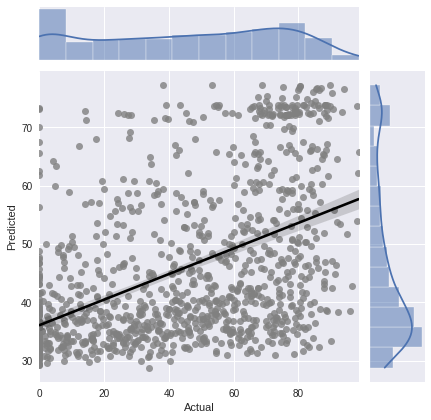

In [165]:
model_svm  = SVR()
print(" Training Model .... \n")
model_svm.fit(X_train,Y_train)
print("Model Trained")
print("Accuracy on training data , ",model_svm.score(X_train,Y_train))
print("Accuracy on test data , ",model_svm.score(X_test,Y_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model_svm.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model_svm.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model_svm.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,model_svm.predict(X_test),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.ax_joint.set_xlabel('Actual')
ax.ax_joint.set_ylabel('Predicted')


train_sizes, train_scores, validation_scores = learning_curve(
estimator = model_svm,
X = X_train,
y = Y_train, train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1.0]), cv = 5,
scoring = 'r2')

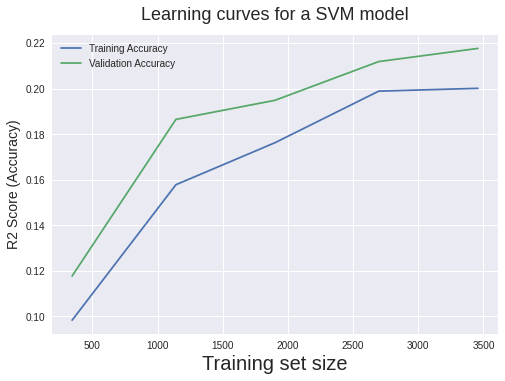

In [166]:
plt.style.use('seaborn')
plt.plot(train_sizes, pd.DataFrame(train_scores).iloc[:,4], label = 'Training Accuracy')
plt.plot(train_sizes, pd.DataFrame(validation_scores).iloc[:,4], label = 'Validation Accuracy')
plt.ylabel('R2 Score (Accuracy)', fontsize = 14)
plt.xlabel('Training set size', fontsize = 20)
plt.title('Learning curves for a SVM model', fontsize = 18, y = 1.03)
plt.legend()


## XGB boost

 Training Model .... 

[19:56:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Trained
Accuracy on training data ,  0.7539953822384422
Accuracy on test data ,  0.6962662524900138
Mean Squred Error   252.12216241129138
Root Mean Squred Error   15.878355154463934
Mean Absolute Error   12.49999793645831


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[19:56:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

<Figure size 360x360 with 0 Axes>

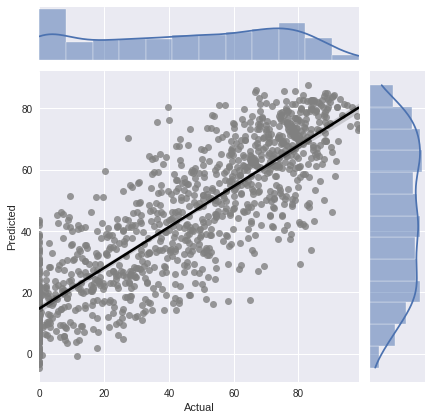

In [167]:
model_xgb  = XGBRegressor()
print(" Training Model .... \n")
model_xgb.fit(X_train,Y_train)
print("Model Trained")
print("Accuracy on training data , ",model_xgb.score(X_train,Y_train))
print("Accuracy on test data , ",model_xgb.score(X_test,Y_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model_xgb.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model_xgb.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model_xgb.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,model_xgb.predict(X_test),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.ax_joint.set_xlabel('Actual')
ax.ax_joint.set_ylabel('Predicted')


train_sizes, train_scores, validation_scores = learning_curve(
estimator = model_xgb,
X = X_train,
y = Y_train, train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1.0]), cv = 5,
scoring = 'r2')

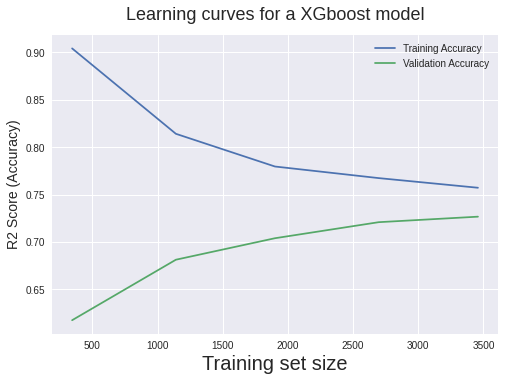

In [168]:
plt.style.use('seaborn')
plt.plot(train_sizes, pd.DataFrame(train_scores).iloc[:,4], label = 'Training Accuracy')
plt.plot(train_sizes, pd.DataFrame(validation_scores).iloc[:,4], label = 'Validation Accuracy')
plt.ylabel('R2 Score (Accuracy)', fontsize = 14)
plt.xlabel('Training set size', fontsize = 20)
plt.title('Learning curves for a XGboost model', fontsize = 18, y = 1.03)
plt.legend()

In [169]:
X_train = np.array(scale(X_train)).reshape(X_train.shape[0],X_train.shape[1],1)
X_test =  np.array(scale(X_test)).reshape(X_test.shape[0],X_test.shape[1],1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


## LSTM ( Deep Learning Model )

In [170]:
opt = keras.optimizers.Adam()

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True,input_shape=(15,1)))
model.add(LSTM(10,activation='relu'))
model.add(Dense(1))
model.compile(optimizer=opt, loss='mse')


In [171]:
history = model.fit(X_train,scale(Y_train),validation_data=(X_test,scale(Y_test)),epochs=100,batch_size=64)

Epoch 1/100
68/68 [==============================] - 7s 60ms/step - loss: 0.9825 - val_loss: 0.8575
Epoch 2/100
68/68 [==============================] - 3s 48ms/step - loss: 0.7345 - val_loss: 0.6730
Epoch 3/100
68/68 [==============================] - 3s 48ms/step - loss: 0.6228 - val_loss: 0.6699
Epoch 4/100
68/68 [==============================] - 3s 46ms/step - loss: 0.6309 - val_loss: 0.6569
Epoch 5/100
68/68 [==============================] - 3s 48ms/step - loss: 0.6335 - val_loss: 0.6596
Epoch 6/100
68/68 [==============================] - 3s 48ms/step - loss: 0.6124 - val_loss: 0.6461
Epoch 7/100
68/68 [==============================] - 3s 49ms/step - loss: 0.6173 - val_loss: 0.6590
Epoch 8/100
68/68 [==============================] - 4s 52ms/step - loss: 0.6054 - val_loss: 0.6245
Epoch 9/100
68/68 [==============================] - 4s 52ms/step - loss: 0.5975 - val_loss: 0.5915
Epoch 10/100
68/68 [==============================] - 3s 50ms/step - loss: 0.5644 - val_loss: 0.5581

Accuracy on training data ,  0.6606074954674233
Accuracy on test data ,  0.5789779799401377
Mean Squred Error   2812.630834228906
Root Mean Squred Error   53.03424209158557
Mean Absolute Error   44.90895469037144


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(29.0, 0.5, 'Predicted')

<Figure size 360x360 with 0 Axes>

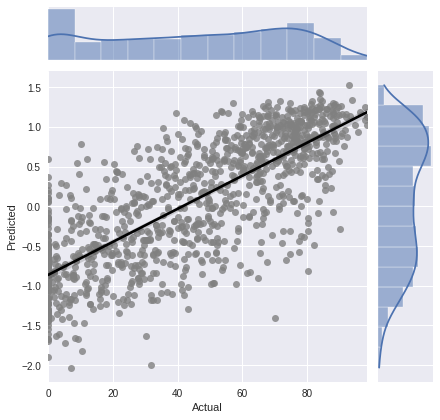

In [179]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)
print("Accuracy on training data , ",r2_score(scale(Y_train),p_train))
print("Accuracy on test data , ",r2_score(scale(Y_test),p_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,p_test.reshape(X_test.shape[0]),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.fig.suptitle('Q-Q plot Predicted vs actual scores', fontsize = 18, y = 1.05)
ax.fig.tight_layout()
ax.fig.subplots_adjust(top=0.95)
ax.ax_joint.set_xlabel('Actual', fontsize = 14)
ax.ax_joint.set_ylabel('Predicted',fontsize = 14)


Text(0, 0.5, 'Error')

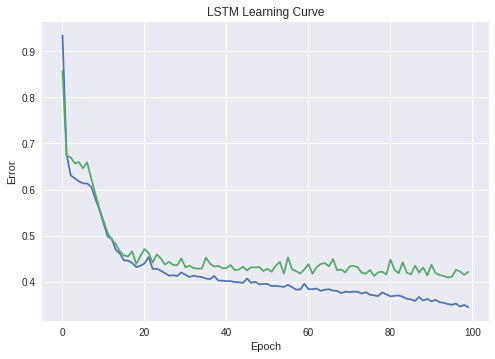

In [180]:
plt.style.use('seaborn')
plt.plot(history.history['loss'],label = 'Training erroe')
plt.plot(history.history['val_loss'], label = 'Validatoin Error')
plt.title('LSTM Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Error')

#For Social Pillar score

In [181]:
X = DF.drop(['Social Pillar score'],axis=1)
Y = Social_Pillar_score

In [182]:
corr_features = correlation(X, 0.60)
print("No. o features to drop : ",len(set(corr_features)))

X.drop(corr_features,axis=1,inplace=True)

No. o features to drop :  3


In [183]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

## Random Forest

 Training Model .... 

Model Trained
Accuracy on training data ,  0.9629774163226891
Accuracy on test data ,  0.724188427100535
Mean Squred Error   113.39394157054355
Root Mean Squred Error   10.648659144255841
Mean Absolute Error   8.174965871511112


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 360x360 with 0 Axes>

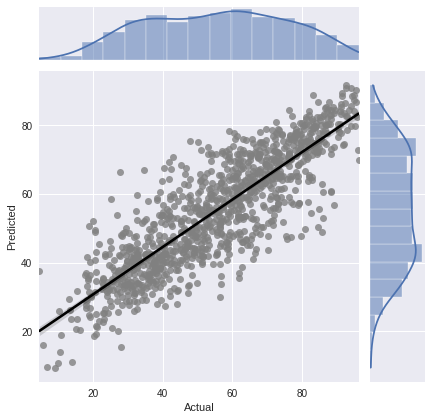

In [184]:
model_rf  = RandomForestRegressor()
print(" Training Model .... \n")
model_rf.fit(X_train,Y_train)
print("Model Trained")
print("Accuracy on training data , ",model_rf.score(X_train,Y_train))
print("Accuracy on test data , ",model_rf.score(X_test,Y_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model_rf.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model_rf.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model_rf.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,model_rf.predict(X_test),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.ax_joint.set_xlabel('Actual')
ax.ax_joint.set_ylabel('Predicted')


train_sizes, train_scores, validation_scores = learning_curve(
estimator = model_rf,
X = X_train,
y = Y_train, train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1.0]), cv = 5,
scoring = 'r2')

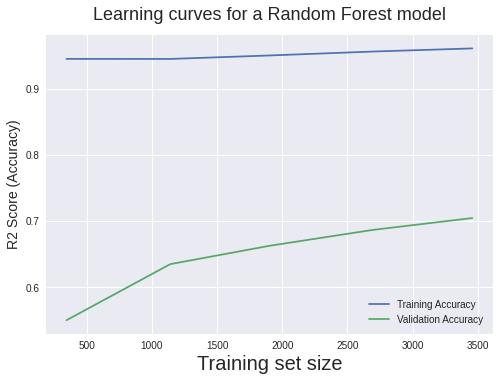

In [185]:
plt.style.use('seaborn')
plt.plot(train_sizes, pd.DataFrame(train_scores).iloc[:,4], label = 'Training Accuracy')
plt.plot(train_sizes, pd.DataFrame(validation_scores).iloc[:,4], label = 'Validation Accuracy')
plt.ylabel('R2 Score (Accuracy)', fontsize = 14)
plt.xlabel('Training set size', fontsize = 20)
plt.title('Learning curves for a Random Forest model', fontsize = 18, y = 1.03)
plt.legend()


## SVM

 Training Model .... 

Model Trained
Accuracy on training data ,  0.20328286492893066
Accuracy on test data ,  0.17861032301499025
Mean Squred Error   337.6965370218028
Root Mean Squred Error   18.376521352579296
Mean Absolute Error   15.076450370889873


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 360x360 with 0 Axes>

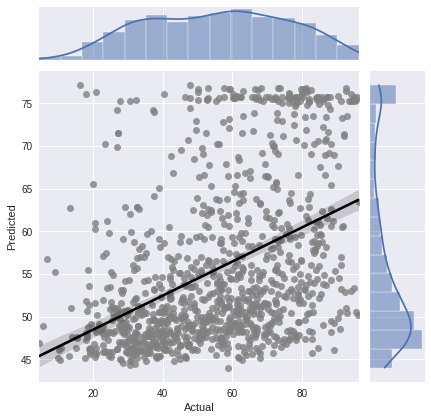

In [186]:
model_svm  = SVR()
print(" Training Model .... \n")
model_svm.fit(X_train,Y_train)
print("Model Trained")
print("Accuracy on training data , ",model_svm.score(X_train,Y_train))
print("Accuracy on test data , ",model_svm.score(X_test,Y_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model_svm.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model_svm.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model_svm.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,model_svm.predict(X_test),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.ax_joint.set_xlabel('Actual')
ax.ax_joint.set_ylabel('Predicted')


train_sizes, train_scores, validation_scores = learning_curve(
estimator = model_svm,
X = X_train,
y = Y_train, train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1.0]), cv = 5,
scoring = 'r2')

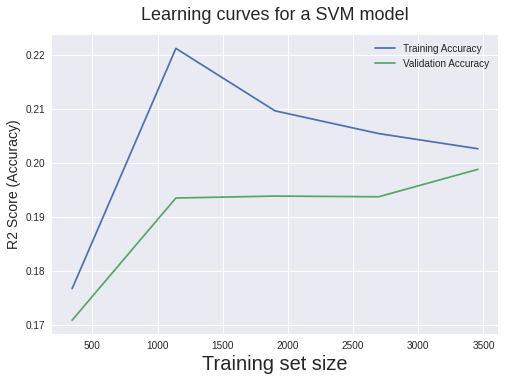

In [187]:
plt.style.use('seaborn')
plt.plot(train_sizes, pd.DataFrame(train_scores).iloc[:,4], label = 'Training Accuracy')
plt.plot(train_sizes, pd.DataFrame(validation_scores).iloc[:,4], label = 'Validation Accuracy')
plt.ylabel('R2 Score (Accuracy)', fontsize = 14)
plt.xlabel('Training set size', fontsize = 20)
plt.title('Learning curves for a SVM model', fontsize = 18, y = 1.03)
plt.legend()

## XGBoost

 Training Model .... 

[20:18:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Trained
Accuracy on training data ,  0.700212345549383
Accuracy on test data ,  0.6321912808378488
Mean Squred Error   151.21657141273045
Root Mean Squred Error   12.297014735810087
Mean Absolute Error   9.77699509346533


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[20:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

<Figure size 360x360 with 0 Axes>

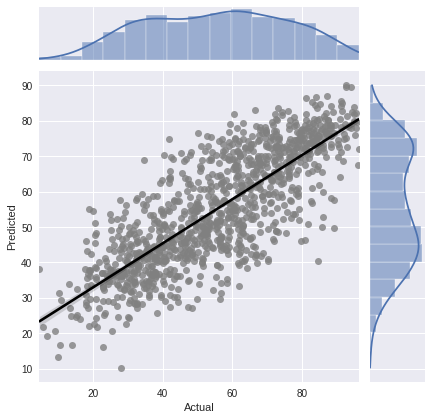

In [188]:
model_xgb  = XGBRegressor()
print(" Training Model .... \n")
model_xgb.fit(X_train,Y_train)
print("Model Trained")
print("Accuracy on training data , ",model_xgb.score(X_train,Y_train))
print("Accuracy on test data , ",model_xgb.score(X_test,Y_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model_xgb.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model_xgb.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model_xgb.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,model_xgb.predict(X_test),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.ax_joint.set_xlabel('Actual')
ax.ax_joint.set_ylabel('Predicted')


train_sizes, train_scores, validation_scores = learning_curve(
estimator = model_xgb,
X = X_train,
y = Y_train, train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1.0]), cv = 5,
scoring = 'r2')

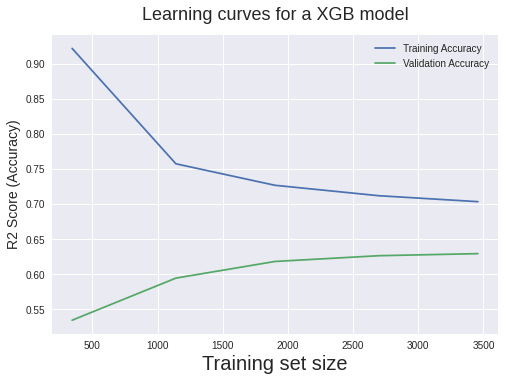

In [189]:
plt.style.use('seaborn')
plt.plot(train_sizes, pd.DataFrame(train_scores).iloc[:,4], label = 'Training Accuracy')
plt.plot(train_sizes, pd.DataFrame(validation_scores).iloc[:,4], label = 'Validation Accuracy')
plt.ylabel('R2 Score (Accuracy)', fontsize = 14)
plt.xlabel('Training set size', fontsize = 20)
plt.title('Learning curves for a XGB model', fontsize = 18, y = 1.03)
plt.legend()

In [190]:
X_train = np.array(scale(X_train)).reshape(X_train.shape[0],X_train.shape[1],1)
X_test =  np.array(scale(X_test)).reshape(X_test.shape[0],X_test.shape[1],1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


## LSTM

In [191]:
opt = keras.optimizers.Adam()

model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=True,input_shape=(12,1)))
model.add(LSTM(10,activation='relu'))
model.add(Dense(1))
model.compile(optimizer=opt, loss='mse')


In [192]:
history = model.fit(X_train,scale(Y_train),validation_data=(X_test,scale(Y_test)),epochs=100,batch_size=64)

Epoch 1/100
68/68 [==============================] - 7s 64ms/step - loss: 1.0125 - val_loss: 0.9271
Epoch 2/100
68/68 [==============================] - 4s 53ms/step - loss: 0.8571 - val_loss: 0.7198
Epoch 3/100
68/68 [==============================] - 4s 54ms/step - loss: 0.6818 - val_loss: 0.6886
Epoch 4/100
68/68 [==============================] - 4s 52ms/step - loss: 0.6711 - val_loss: 0.6736
Epoch 5/100
68/68 [==============================] - 3s 51ms/step - loss: 0.6498 - val_loss: 0.6686
Epoch 6/100
68/68 [==============================] - 4s 52ms/step - loss: 0.6446 - val_loss: 0.6644
Epoch 7/100
68/68 [==============================] - 4s 52ms/step - loss: 0.6370 - val_loss: 0.6650
Epoch 8/100
68/68 [==============================] - 3s 48ms/step - loss: 0.6424 - val_loss: 0.6616
Epoch 9/100
68/68 [==============================] - 3s 48ms/step - loss: 0.6586 - val_loss: 0.6538
Epoch 10/100
68/68 [==============================] - 3s 47ms/step - loss: 0.6327 - val_loss: 0.6414

Accuracy on training data ,  0.5871599385956234
Accuracy on test data ,  0.5474416335073342
Mean Squred Error   3455.68605172525
Root Mean Squred Error   58.78508358185135
Mean Absolute Error   55.37819513568167


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(29.0, 0.5, 'Predicted')

<Figure size 360x360 with 0 Axes>

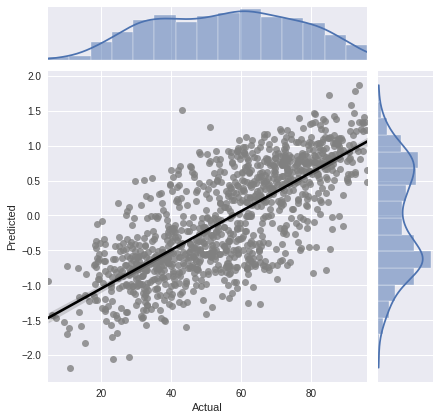

In [193]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)
print("Accuracy on training data , ",r2_score(scale(Y_train),p_train))
print("Accuracy on test data , ",r2_score(scale(Y_test),p_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,p_test.reshape(X_test.shape[0]),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.ax_joint.set_xlabel('Actual')
ax.ax_joint.set_ylabel('Predicted')


Text(0, 0.5, 'Error')

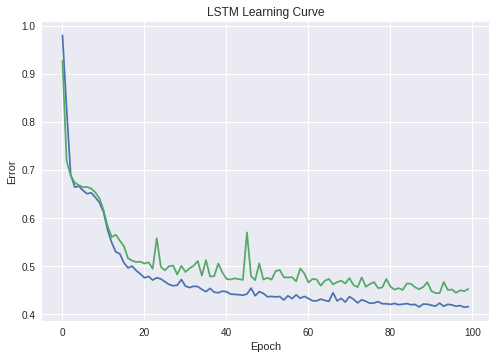

In [194]:
plt.style.use('seaborn')
plt.plot(history.history['loss'],label = 'Training erroe')
plt.plot(history.history['val_loss'], label = 'Validatoin Error')
plt.title('LSTM Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Error')

# For Governance Pillar score

In [195]:
X = DF.drop(['EPS','P/E','Total Debt to Equity ','Short interest % ','Governance Pillar score'],axis=1)
Y = Governance_Pillar_score

In [196]:
corr_features = correlation(X, 0.60)
print("No. o features to drop : ",len(set(corr_features)))

X.drop(corr_features,axis=1,inplace=True)

No. o features to drop :  3


In [197]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

## Random Forest

 Training Model .... 

Model Trained
Accuracy on training data ,  0.9305271159911473
Accuracy on test data ,  0.4958111729516036
Mean Squred Error   233.80864780128812
Root Mean Squred Error   15.290802719324061
Mean Absolute Error   12.3997189071104


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 360x360 with 0 Axes>

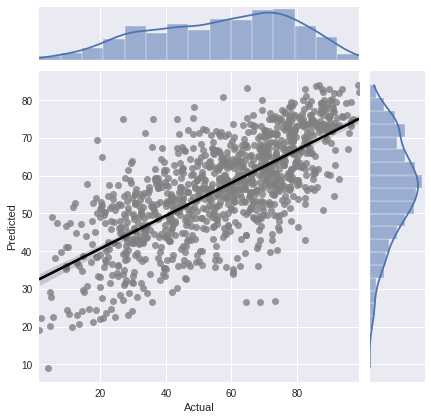

In [198]:
model_rf  = RandomForestRegressor()
print(" Training Model .... \n")
model_rf.fit(X_train,Y_train)
print("Model Trained")
print("Accuracy on training data , ",model_rf.score(X_train,Y_train))
print("Accuracy on test data , ",model_rf.score(X_test,Y_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model_rf.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model_rf.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model_rf.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,model_rf.predict(X_test),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.ax_joint.set_xlabel('Actual')
ax.ax_joint.set_ylabel('Predicted')


train_sizes, train_scores, validation_scores = learning_curve(
estimator = model_rf,
X = X_train,
y = Y_train, train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1.0]), cv = 5,
scoring = 'r2')

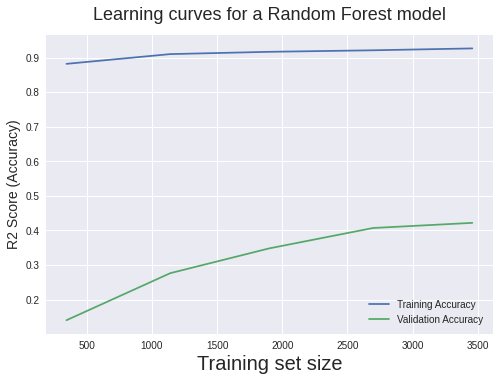

In [199]:
plt.style.use('seaborn')
plt.plot(train_sizes, pd.DataFrame(train_scores).iloc[:,4], label = 'Training Accuracy')
plt.plot(train_sizes, pd.DataFrame(validation_scores).iloc[:,4], label = 'Validation Accuracy')
plt.ylabel('R2 Score (Accuracy)', fontsize = 14)
plt.xlabel('Training set size', fontsize = 20)
plt.title('Learning curves for a Random Forest model', fontsize = 18, y = 1.03)
plt.legend()


##SVM

 Training Model .... 

Model Trained
Accuracy on training data ,  0.019960248083735976
Accuracy on test data ,  0.04080266385928988
Mean Squred Error   444.81079331043924
Root Mean Squred Error   21.09053800429091
Mean Absolute Error   17.673087851672353


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 360x360 with 0 Axes>

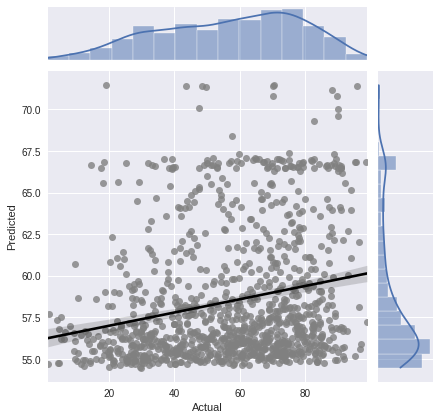

In [200]:
model_svm  = SVR()
print(" Training Model .... \n")
model_svm.fit(X_train,Y_train)
print("Model Trained")
print("Accuracy on training data , ",model_svm.score(X_train,Y_train))
print("Accuracy on test data , ",model_svm.score(X_test,Y_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model_svm.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model_svm.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model_svm.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,model_svm.predict(X_test),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.ax_joint.set_xlabel('Actual')
ax.ax_joint.set_ylabel('Predicted')


train_sizes, train_scores, validation_scores = learning_curve(
estimator = model_svm,
X = X_train,
y = Y_train, train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1.0]), cv = 5,
scoring = 'r2')

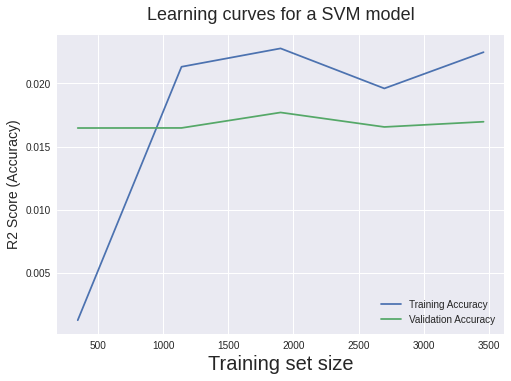

In [201]:
plt.style.use('seaborn')
plt.plot(train_sizes, pd.DataFrame(train_scores).iloc[:,4], label = 'Training Accuracy')
plt.plot(train_sizes, pd.DataFrame(validation_scores).iloc[:,4], label = 'Validation Accuracy')
plt.ylabel('R2 Score (Accuracy)', fontsize = 14)
plt.xlabel('Training set size', fontsize = 20)
plt.title('Learning curves for a SVM model', fontsize = 18, y = 1.03)
plt.legend()

#XGBoost

 Training Model .... 

[20:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Trained
Accuracy on training data ,  0.4235546911602234
Accuracy on test data ,  0.31718718953736846
Mean Squred Error   316.6423596696259
Root Mean Squred Error   17.794447439289197
Mean Absolute Error   14.696202931595305


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[20:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

<Figure size 360x360 with 0 Axes>

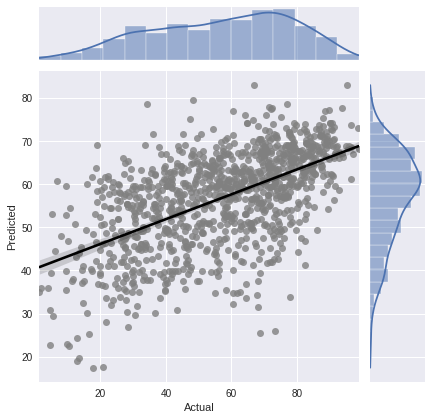

In [202]:
model_xgb  = XGBRegressor()
print(" Training Model .... \n")
model_xgb.fit(X_train,Y_train)
print("Model Trained")
print("Accuracy on training data , ",model_xgb.score(X_train,Y_train))
print("Accuracy on test data , ",model_xgb.score(X_test,Y_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model_xgb.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model_xgb.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model_xgb.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,model_xgb.predict(X_test),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.ax_joint.set_xlabel('Actual')
ax.ax_joint.set_ylabel('Predicted')


train_sizes, train_scores, validation_scores = learning_curve(
estimator = model_xgb,
X = X_train,
y = Y_train, train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1.0]), cv = 5,
scoring = 'r2')

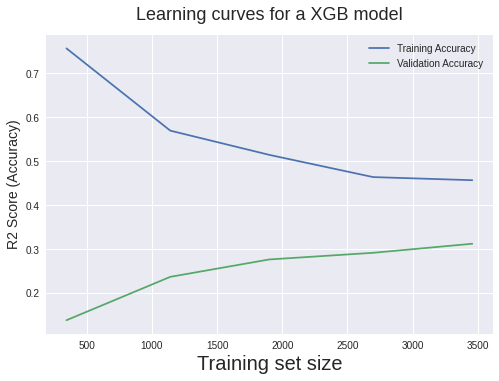

In [203]:
plt.style.use('seaborn')
plt.plot(train_sizes, pd.DataFrame(train_scores).iloc[:,4], label = 'Training Accuracy')
plt.plot(train_sizes, pd.DataFrame(validation_scores).iloc[:,4], label = 'Validation Accuracy')
plt.ylabel('R2 Score (Accuracy)', fontsize = 14)
plt.xlabel('Training set size', fontsize = 20)
plt.title('Learning curves for a XGB model', fontsize = 18, y = 1.03)
plt.legend()

In [204]:
X_train = np.array(scale(X_train)).reshape(X_train.shape[0],X_train.shape[1],1)
X_test =  np.array(scale(X_test)).reshape(X_test.shape[0],X_test.shape[1],1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


## LSTM

In [205]:
opt = keras.optimizers.Adam()

model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=True,input_shape=(12,1)))
model.add(LSTM(10,activation='relu'))
model.add(Dense(1))
model.compile(optimizer=opt, loss='mse')


In [206]:
history = model.fit(X_train,scale(Y_train),validation_data=(X_test,scale(Y_test)),epochs=100,batch_size=64)

Epoch 1/100
68/68 [==============================] - 6s 49ms/step - loss: 0.9935 - val_loss: 0.9954
Epoch 2/100
68/68 [==============================] - 3s 37ms/step - loss: 0.9917 - val_loss: 0.9758
Epoch 3/100
68/68 [==============================] - 3s 39ms/step - loss: 0.9641 - val_loss: 0.9315
Epoch 4/100
68/68 [==============================] - 3s 37ms/step - loss: 0.9231 - val_loss: 0.9195
Epoch 5/100
68/68 [==============================] - 3s 38ms/step - loss: 0.9339 - val_loss: 0.9122
Epoch 6/100
68/68 [==============================] - 3s 38ms/step - loss: 0.9250 - val_loss: 0.9077
Epoch 7/100
68/68 [==============================] - 3s 37ms/step - loss: 0.9079 - val_loss: 0.9055
Epoch 8/100
68/68 [==============================] - 3s 37ms/step - loss: 0.9157 - val_loss: 0.9079
Epoch 9/100
68/68 [==============================] - 3s 40ms/step - loss: 0.9115 - val_loss: 0.8996
Epoch 10/100
68/68 [==============================] - 3s 41ms/step - loss: 0.8940 - val_loss: 0.8980

Accuracy on training data ,  0.2673615880585757
Accuracy on test data ,  0.20810634644663872
Mean Squred Error   3672.1543527973213
Root Mean Squred Error   60.59830321714727
Mean Absolute Error   56.738288092802875


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(29.0, 0.5, 'Predicted')

<Figure size 360x360 with 0 Axes>

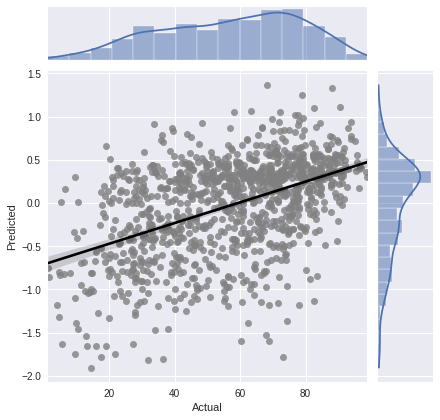

In [207]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)
print("Accuracy on training data , ",r2_score(scale(Y_train),p_train))
print("Accuracy on test data , ",r2_score(scale(Y_test),p_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,p_test.reshape(X_test.shape[0]),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.ax_joint.set_xlabel('Actual')
ax.ax_joint.set_ylabel('Predicted')

Text(0, 0.5, 'Error')

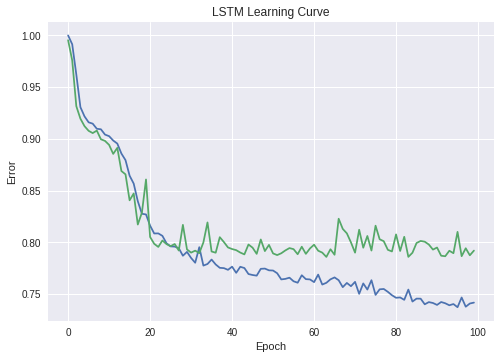

In [208]:
plt.style.use('seaborn')
plt.plot(history.history['loss'],label = 'Training erroe')
plt.plot(history.history['val_loss'], label = 'Validatoin Error')
plt.title('LSTM Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Error')

In [208]:
model_xgb  = XGBRegressor()
print(" Training Model .... \n")
model_xgb.fit(X_train,Y_train)
print("Model Trained")
print("Accuracy on training data , ",model_xgb.score(X_train,Y_train))
print("Accuracy on test data , ",model_xgb.score(X_test,Y_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model_xgb.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model_xgb.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model_xgb.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,model_xgb.predict(X_test),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.fig.suptitle('Q-Q plot Predicted vs actual scores', fontsize = 18, y = 1.05)
ax.fig.tight_layout()
ax.fig.subplots_adjust(top=0.95)
ax.ax_joint.set_xlabel('Actual', fontsize = 14)
ax.ax_joint.set_ylabel('Predicted',fontsize = 14)


train_sizes, train_scores, validation_scores = learning_curve(
estimator = model_xgb,
X = X_train,
y = Y_train, train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1.0]), cv = 5,
scoring = 'r2')

In [ ]:
model_xgb  = XGBRegressor()
print(" Training Model .... \n")
model_xgb.fit(X_train,Y_train)
print("Model Trained")
print("Accuracy on training data , ",model_xgb.score(X_train,Y_train))
print("Accuracy on test data , ",model_xgb.score(X_test,Y_test))

print("Mean Squred Error  ", mean_squared_error(Y_test,model_xgb.predict(X_test)))
print("Root Mean Squred Error  ", mean_squared_error(Y_test,model_xgb.predict(X_test),squared=False))
print("Mean Absolute Error  ", mean_absolute_error(Y_test,model_xgb.predict(X_test)))

plt.figure(figsize=(5,5))
ax = sns.jointplot(Y_test,model_xgb.predict(X_test),kind = 'reg',joint_kws={'color':'gray','line_kws':{'color':'black'}})
ax.fig.suptitle('XGBoost Q-Q plot Predicted vs actual scores', fontsize = 18, y = 1.05)
ax.fig.tight_layout()
ax.fig.subplots_adjust(top=0.95)
ax.ax_joint.set_xlabel('Actual', fontsize = 14)
ax.ax_joint.set_ylabel('Predicted',fontsize = 14)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = model_xgb,
X = X_train,
y = Y_train, train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1.0]), cv = 5,
scoring = 'r2')